## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
# Opening JSON file 
f = open('/kaggle/input/reviewdata/complaints-2021-05-14_08_161.json')

# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [3]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [5]:
#print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [6]:
#Assign new column names
def newname(col):
    col = re.sub("^_","",col)
    col = re.sub("^source.","",col)
    return col

for col in df.columns:
    df.rename(columns={col:newname(col)},inplace=True) 

df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      78313 non-null  object 
 1   type                       78313 non-null  object 
 2   id                         78313 non-null  object 
 3   score                      78313 non-null  float64
 4   tags                       10900 non-null  object 
 5   zip_code                   71556 non-null  object 
 6   complaint_id               78313 non-null  object 
 7   issue                      78313 non-null  object 
 8   date_received              78313 non-null  object 
 9   state                      76322 non-null  object 
 10  consumer_disputed          78313 non-null  object 
 11  product                    78313 non-null  object 
 12  company_response           78313 non-null  object 
 13  company                    78313 non-null  obj

In [7]:
#Assign nan in place of blanks in the complaints column
#df['complaint_what_happened'].value_counts()
#df['complaint_what_happened'].isnull().sum()

df['complaint_what_happened'].replace('',np.nan, inplace=True)

In [8]:
df['complaint_what_happened'].isna().sum()

57241

In [9]:
#Remove all rows where complaints column is nan
df_cleared = df[ ~ df.complaint_what_happened.isnull()]
df_cleared.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided


In [10]:
df_cleared.shape

(21072, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [11]:
# Write your function here to clean the text and remove all the unnecessary elements.
def prep_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("\[.*?\]","",sentence)
    sentence = re.sub("[^\w\s]","",sentence)
    sentence = re.sub("\S*\d+\S*","",sentence)
    return sentence

In [12]:
#testing the method with a short text

test_text = "I upgraded my XXXX XXXX card in XX/XX/2018 and"

sent = prep_text(test_text)

print(sent)

i upgraded my xxxx xxxx card in  and


In [13]:
#Write your function to Lemmatize the texts

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

#Fetching the pos of each word in a given sentence
def fetchPos(sentence):
    doc = nlp(sentence)
    word_Tags = {}
    for word in doc:
        if word.pos_ == "NOUN" or word.pos_ == "PROPN":
            word_Tags[word.text] = 'n'
        elif word.pos_ == "VERB" :
            word_Tags[word.text] = 'v'
        elif word.pos_ == "ADJ" :
            word_Tags[word.text] = 'a'
        elif word.pos_ == "ADV" :
            word_Tags[word.text] = 'r' 
        else :    
            word_Tags[word.text] = 'NA'
    return word_Tags
        

def lemmatizerFunc(sentence):
    wordNet_Lemma = WordNetLemmatizer()
    
    # replace multiple spaces with single space
    sentence = re.sub(r"\s+"," ",sentence)
    
    # get the pos of each word
    pos_tags = fetchPos(sentence)
    
    # tokenize into words
    words = word_tokenize(sentence)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    lemma_words = []
    for word in words:
        if word in pos_tags:
            pos = pos_tags[word]
            if pos != "NA":
                lemma_words.append(wordNet_Lemma.lemmatize(word, pos=pos))
        else :
            lemma_words.append(wordNet_Lemma.lemmatize(word))   

    # join words to make sentence
    document = " ".join(lemma_words)
    return document

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [14]:
#testing method with small text
print(lemmatizerFunc(sent))

upgrade xxxx xxxx card


In [15]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df_cleared[['complaint_what_happened']].copy()

In [16]:
#creating a list of lemmatized text
from tqdm import tqdm
lemma_list = []
for sent in tqdm(df_clean.complaint_what_happened):
    lemma_list.append(lemmatizerFunc(prep_text(sent)))
    
#lemma_list

100%|██████████| 21072/21072 [31:13<00:00, 11.25it/s] 


In [17]:
list_series = pd.Series(lemma_list)
df_clean['lemmatized_complaints'] = list_series.values

In [18]:
df_clean

,complaint_what_happened,lemmatized_complaints
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...
...,...,...
78303,After being a Chase Card customer for well ove...,chase card customer well decade offer multiple...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx call chas xxxx xxxx visa cr...
78310,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...
78311,I have had flawless credit for 30 yrs. I've ha...,flawless credit yr ive chase credit card chase...


In [19]:
#Write your function to extract the POS tags 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

def pos_tag(text):
    # write your code here
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

#pos_tag("good morning name xxxx xxxx appreciate help")


In [20]:
def remove_nonNN(text):
    pos_list = pos_tag(text)
    onlyNNList = []
    for word in pos_list:
        if word[1] == 'NN':
            onlyNNList.append(word[0])
    return " ".join(onlyNNList)

#remove_nonNN("good morning name xxxx xxxx appreciate help")

In [21]:
from tqdm import tqdm
remove_list = []
for sent in tqdm(df_clean.lemmatized_complaints):
    remove_list.append(remove_nonNN(sent))
    
#remove_list

100%|██████████| 21072/21072 [04:13<00:00, 83.00it/s] 


In [22]:
df_clean["complaint_POS_removed"] =  pd.Series(remove_list).values

In [23]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...
...,...,...,...
78303,After being a Chase Card customer for well ove...,chase card customer well decade offer multiple...,chase card customer decade offer solicitation ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx call chas xxxx xxxx visa cr...,call chas xxxx credit card provider claim purc...
78310,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...,pay risk consumer chase bank chase year trust ...
78311,I have had flawless credit for 30 yrs. I've ha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [24]:
# Write your code here to visualise the data according to the 'Complaint' character length
#len(df_clean["complaint_POS_removed"])
df_clean["text_length"] = df_clean.apply(lambda sent: len(sent.complaint_POS_removed), axis=1)

In [25]:
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169
...,...,...,...,...
78303,After being a Chase Card customer for well ove...,chase card customer well decade offer multiple...,chase card customer decade offer solicitation ...,232
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx call chas xxxx xxxx visa cr...,call chas xxxx credit card provider claim purc...,717
78310,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...,pay risk consumer chase bank chase year trust ...,688
78311,I have had flawless credit for 30 yrs. I've ha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,567


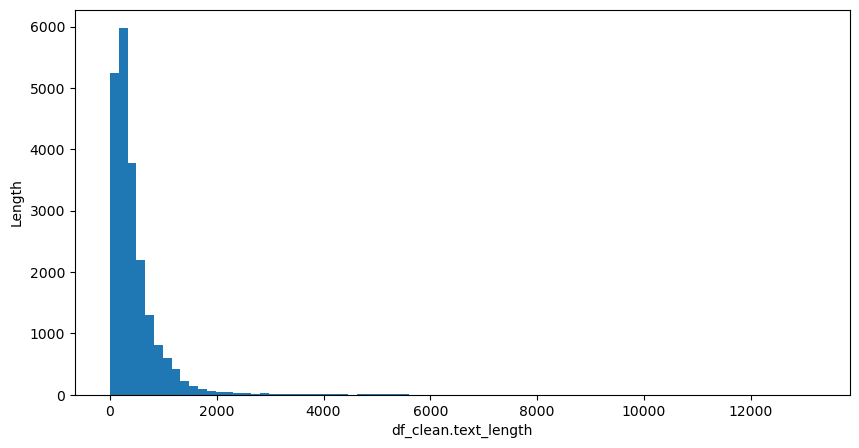

In [26]:
plt.figure(figsize=(10,5))
plt.hist(df_clean.text_length, bins=80)
plt.ylabel("Length")
plt.xlabel("df_clean.text_length")
plt.show()

<Axes: >

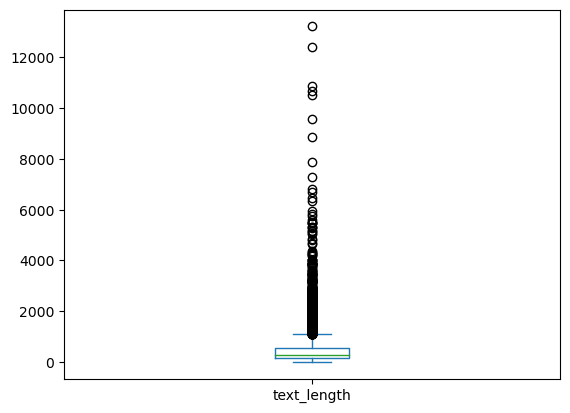

In [27]:
df_clean.text_length.plot.box()

<Axes: >

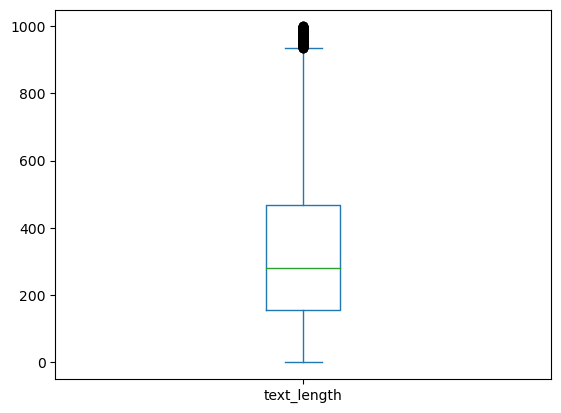

In [28]:
#As per the plot, most of the text is less than 1000 words.
df_clean[df_clean["text_length"]<1000].text_length.plot.box()

#### Find the top 40 words by frequency among all the articles after processing the text.

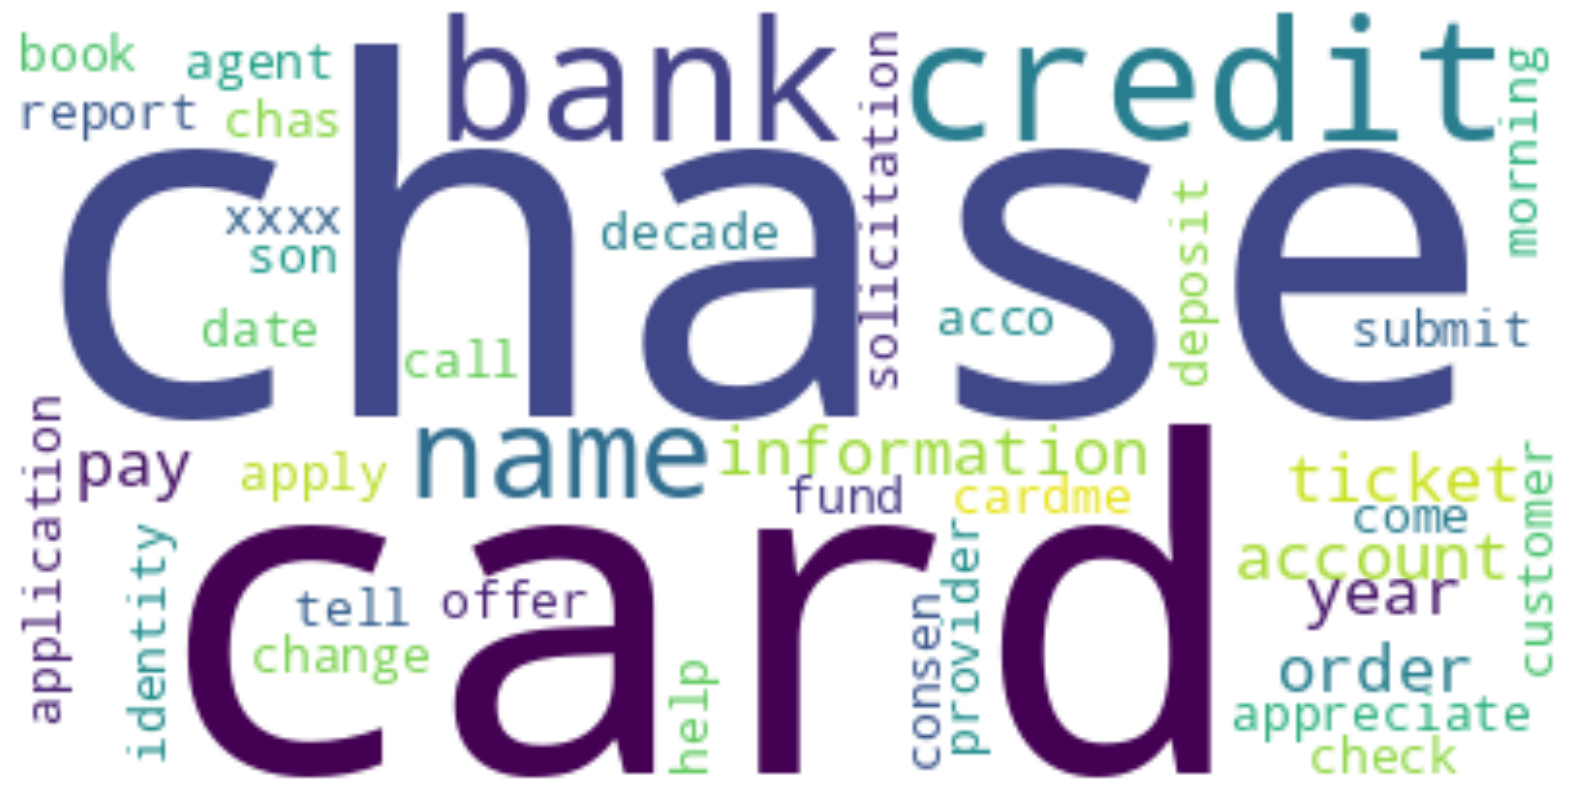

In [29]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

sent = df_clean.complaint_POS_removed

# Create and generate a word image:
wordcloud = WordCloud(max_words=40,  background_color="white" ).generate(str(sent))

# Display the generated image:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [31]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
from nltk.util import ngrams
def anygram(sentence, n):
    grams = ngrams(sentence.split(), n)
    return grams

In [32]:
for sent in anygram(df_clean.Complaint_clean.iloc[1],2):
    print(sent)

('card', 'tell')
('tell', 'agent')
('agent', 'date')
('date', 'change')
('change', 'information')
('information', 'order')
('order', 'upgrade')
('upgrade', 'account')
('account', 'change')
('change', 'anniversary')
('anniversary', 'date')
('date', 'consent')
('consent', 'xxxx')
('xxxx', 'agent')
('agent', 'mislead')


In [33]:
def get_frequency(df,n):
    gram_freq = {}
    for sent in tqdm(df.Complaint_clean):
        #found a sentence which had two words after clean up. So added this 'if' criteria.
        if len(sent.split())>n:
            n_grams = anygram(sent,n)
            for grms in n_grams:
                if grms not in gram_freq:
                    gram_freq[grms] = 1
                else:
                    gram_freq[grms] += 1
    return gram_freq            

In [34]:
# value of Complaint_clean in row number 58 seems to be empty
print(df_clean.Complaint_clean.iloc[58])

In [35]:
# finding null values
df_clean['Complaint_clean'].replace('',np.nan, inplace=True)

In [36]:
#total null values
df_clean['Complaint_clean'].isna().sum()

8

In [37]:
#Remove all rows where complaints column is nan
df_clean_2 = df_clean[ ~ df_clean.Complaint_clean.isnull()]
df_clean_2.head()

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length,Complaint_clean
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180,morning name appreciate help chase bank cardme...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112,card tell agent date change information order ...
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88,card report application submit identity consen...
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429,book ticket come apply ticket card information...
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169,son check deposit chase account fund bank acco...


In [38]:
df_clean_2['Complaint_clean'].isna().sum()

0

In [39]:
df_clean_2.shape

(21064, 5)

In [40]:
#fetching unigrams
unigrams_list = get_frequency(df_clean_2,1)

100%|██████████| 21064/21064 [00:01<00:00, 16090.78it/s]


In [41]:
#unigrams_list

In [42]:
#Print the top 10 words in the unigram frequency
unigrams_sorted = sorted(unigrams_list.items(), key = lambda x: x[1], reverse=True)
unigrams_sorted[:10]

[(('chase',), 53912),
 (('account',), 43264),
 (('credit',), 34143),
 (('bank',), 28411),
 (('card',), 26422),
 (('payment',), 21163),
 (('call',), 18662),
 (('charge',), 17336),
 (('time',), 16049),
 (('day',), 12969)]

In [43]:
#Top 30 unigrams
unigrams_sorted[:30]

[(('chase',), 53912),
 (('account',), 43264),
 (('credit',), 34143),
 (('bank',), 28411),
 (('card',), 26422),
 (('payment',), 21163),
 (('call',), 18662),
 (('charge',), 17336),
 (('time',), 16049),
 (('day',), 12969),
 (('pay',), 12842),
 (('xxxx',), 12154),
 (('money',), 11961),
 (('report',), 11473),
 (('loan',), 11001),
 (('check',), 10907),
 (('state',), 10051),
 (('letter',), 9669),
 (('information',), 9653),
 (('claim',), 8821),
 (('tell',), 8703),
 (('transaction',), 8631),
 (('number',), 8617),
 (('month',), 8461),
 (('year',), 8292),
 (('fee',), 8223),
 (('amount',), 8220),
 (('mortgage',), 8192),
 (('customer',), 8162),
 (('service',), 7863)]

In [44]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigrams_list = get_frequency(df_clean_2,2)
bigrams_sorted = sorted(bigrams_list.items(), key = lambda x: x[1], reverse=True)
bigrams_sorted[:30]

100%|██████████| 21064/21064 [00:01<00:00, 10602.99it/s]


[(('credit', 'card'), 12574),
 (('chase', 'bank'), 5453),
 (('credit', 'report'), 4048),
 (('call', 'chase'), 3211),
 (('customer', 'service'), 3075),
 (('chase', 'credit'), 2974),
 (('bank', 'account'), 2492),
 (('check', 'account'), 2338),
 (('chase', 'account'), 2243),
 (('account', 'chase'), 2012),
 (('account', 'account'), 1716),
 (('phone', 'call'), 1697),
 (('account', 'bank'), 1557),
 (('credit', 'score'), 1505),
 (('letter', 'chase'), 1316),
 (('card', 'account'), 1295),
 (('interest', 'rate'), 1287),
 (('account', 'credit'), 1262),
 (('business', 'day'), 1261),
 (('credit', 'bureau'), 1249),
 (('phone', 'number'), 1239),
 (('card', 'chase'), 1204),
 (('contact', 'chase'), 1195),
 (('payment', 'payment'), 1108),
 (('report', 'credit'), 1107),
 (('debit', 'card'), 1107),
 (('card', 'company'), 1097),
 (('account', 'number'), 1082),
 (('fraud', 'department'), 1059),
 (('mortgage', 'payment'), 1057)]

In [45]:
#Print the top 10 words in the bigram frequency
bigrams_sorted[:10]

[(('credit', 'card'), 12574),
 (('chase', 'bank'), 5453),
 (('credit', 'report'), 4048),
 (('call', 'chase'), 3211),
 (('customer', 'service'), 3075),
 (('chase', 'credit'), 2974),
 (('bank', 'account'), 2492),
 (('check', 'account'), 2338),
 (('chase', 'account'), 2243),
 (('account', 'chase'), 2012)]

In [46]:
df_clean_2['Complaint_clean'].iloc[5]

'inquiry'

In [47]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigrams_list = get_frequency(df_clean_2,3)
trigrams_sorted = sorted(trigrams_list.items(), key = lambda x: x[1], reverse=True)
trigrams_sorted[:30]

100%|██████████| 21064/21064 [00:01<00:00, 10979.19it/s]


[(('chase', 'credit', 'card'), 2150),
 (('credit', 'card', 'company'), 993),
 (('credit', 'card', 'account'), 894),
 (('credit', 'card', 'chase'), 655),
 (('chase', 'customer', 'service'), 489),
 (('charge', 'credit', 'card'), 466),
 (('credit', 'card', 'credit'), 446),
 (('inquiry', 'credit', 'report'), 401),
 (('call', 'customer', 'service'), 401),
 (('credit', 'report', 'credit'), 370),
 (('account', 'credit', 'card'), 333),
 (('credit', 'reporting', 'agency'), 329),
 (('call', 'chase', 'bank'), 327),
 (('credit', 'card', 'charge'), 325),
 (('chase', 'bank', 'account'), 324),
 (('bank', 'credit', 'card'), 318),
 (('credit', 'card', 'bank'), 307),
 (('pay', 'credit', 'card'), 288),
 (('chase', 'fraud', 'department'), 286),
 (('use', 'credit', 'card'), 286),
 (('credit', 'reporting', 'act'), 280),
 (('card', 'credit', 'card'), 278),
 (('credit', 'card', 'payment'), 264),
 (('phone', 'call', 'chase'), 260),
 (('consumer', 'protection', 'bureau'), 254),
 (('account', 'credit', 'report')

In [48]:
#Print the top 10 words in the trigram frequency
trigrams_sorted[:10]

[(('chase', 'credit', 'card'), 2150),
 (('credit', 'card', 'company'), 993),
 (('credit', 'card', 'account'), 894),
 (('credit', 'card', 'chase'), 655),
 (('chase', 'customer', 'service'), 489),
 (('charge', 'credit', 'card'), 466),
 (('credit', 'card', 'credit'), 446),
 (('inquiry', 'credit', 'report'), 401),
 (('call', 'customer', 'service'), 401),
 (('credit', 'report', 'credit'), 370)]

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [49]:
df_clean_2['Complaint_clean'] = df_clean_2['Complaint_clean'].str.replace('xxxx','')

/tmp/ipykernel_32/3668038613.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
#All masked texts has been removed
df_clean_2

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length,Complaint_clean
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180,morning name appreciate help chase bank cardme...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112,card tell agent date change information order ...
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88,card report application submit identity consen...
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429,book ticket come apply ticket card information...
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169,son check deposit chase account fund bank acco...
...,...,...,...,...,...
78303,After being a Chase Card customer for well ove...,chase card customer well decade offer multiple...,chase card customer decade offer solicitation ...,232,chase card customer decade offer solicitation ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx call chas xxxx xxxx visa cr...,call chas xxxx credit card provider claim purc...,717,call chas credit card provider claim purchase...
78310,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...,pay risk consumer chase bank chase year trust ...,688,pay risk consumer chase bank chase year trust ...
78311,I have had flawless credit for 30 yrs. I've ha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,567,flawless credit chase credit card chase freedo...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [51]:
df_clean_2.shape

(21064, 5)

In [52]:
#Write your code here to initialise the TfidfVectorizer 

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [53]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean_2.Complaint_clean)

In [54]:
dtm.shape

(21064, 6962)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [55]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [56]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [57]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

6962

In [58]:
H = nmf_model.components_

In [59]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]
    
topic_words   

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,chase,deposit,fund,day,branch,transaction,transfer,number,claim,tell,business
Topic 2,credit,card,report,inquiry,chase,account,company,score,bureau,information,debt,limit,letter,application,year
Topic 3,loan,mortgage,home,chase,modification,property,year,letter,rate,time,house,sale,document,foreclosure,request
Topic 4,charge,fee,card,chase,dispute,transaction,purchase,merchant,refund,claim,fraud,pay,service,balance,statement
Topic 5,payment,pay,balance,month,statement,fee,day,auto,time,date,chase,credit,account,year,mortgage


In [60]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
nm_transform = nmf_model.transform(dtm)
nm_transform

array([[0.02543855, 0.01365092, 0.02440753, 0.00876183, 0.00551334],
       [0.00986197, 0.01332913, 0.00621965, 0.00851901, 0.00215595],
       [0.        , 0.0557438 , 0.00017788, 0.        , 0.        ],
       ...,
       [0.01908903, 0.02092906, 0.01366436, 0.02199047, 0.        ],
       [0.00326176, 0.03961591, 0.00517595, 0.02337802, 0.09643177],
       [0.02996321, 0.03025229, 0.00569857, 0.00908291, 0.09882648]])

In [61]:
nm_transform[0].round(2)
nm_transform[0].argmax()
nm_transform.argmax(axis=1)

array([0, 1, 1, ..., 3, 4, 4])

In [62]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean_2['Topic'] = nm_transform.argmax(axis = 1)

/tmp/ipykernel_32/1185176877.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df_clean_2.shape

(21064, 6)

In [64]:
df_clean_2.head()

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180,morning name appreciate help chase bank cardme...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112,card tell agent date change information order ...,1
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88,card report application submit identity consen...,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429,book ticket come apply ticket card information...,1
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169,son check deposit chase account fund bank acco...,0


In [65]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean_2.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180,morning name appreciate help chase bank cardme...,0
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169,son check deposit chase account fund bank acco...,0
17,With out notice J.P. Morgan Chase restricted m...,notice jp morgan chase restrict account debit ...,jp restrict account debit card tuesday thursda...,625,jp restrict account debit card tuesday thursda...,0
24,mishandling of this account by Chase auto and ...,mishandle account chase auto xxxx,account auto xxxx,17,account auto,0
27,I opened an account with chase bank on XXXX an...,open account chase bank xxxx use code xxxx bon...,account bank xxxx use code bonus call term tel...,106,account bank use code bonus call term tell de...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112,card tell agent date change information order ...,1
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88,card report application submit identity consen...,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429,book ticket come apply ticket card information...,1
15,Can you please remove inquiry,remove inquiry,inquiry,7,inquiry,1
23,I have a Chase credit card which is incorrectl...,chase credit card incorrectly report data cred...,chase credit card credit report company issue,45,chase credit card credit report company issue,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [66]:
#Create the dictionary of Topic names and Topics

Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan" }
#Replace Topics with Topic Names
df_clean_2['Topic'] = df_clean_2['Topic'].map(Topic_names)

/tmp/ipykernel_32/1674331427.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df_clean_2

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,text_length,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate help pu...,morning name appreciate help chase bank cardme...,180,morning name appreciate help chase bank cardme...,Bank Account services
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date change information order ...,112,card tell agent date change information order ...,Credit card or prepaid card
10,Chase Card was reported on XX/XX/2019. However...,chase card report however fraudulent applicati...,card report application submit identity consen...,88,card report application submit identity consen...,Credit card or prepaid card
11,"On XX/XX/2018, while trying to book a XXXX XX...",try book xxxx xxxx ticket come offer apply tic...,book ticket come apply ticket card information...,429,book ticket come apply ticket card information...,Credit card or prepaid card
14,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,son check deposit chase account fund bank acco...,169,son check deposit chase account fund bank acco...,Bank Account services
...,...,...,...,...,...,...
78303,After being a Chase Card customer for well ove...,chase card customer well decade offer multiple...,chase card customer decade offer solicitation ...,232,chase card customer decade offer solicitation ...,Credit card or prepaid card
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx call chas xxxx xxxx visa cr...,call chas xxxx credit card provider claim purc...,717,call chas credit card provider claim purchase...,Theft/Dispute Reporting
78310,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...,pay risk consumer chase bank chase year trust ...,688,pay risk consumer chase bank chase year trust ...,Theft/Dispute Reporting
78311,I have had flawless credit for 30 yrs. I've ha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,567,flawless credit chase credit card chase freedo...,Mortgage/Loan


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [68]:
#Create the dictionary again of Topic names and Topics

Topic_names = {"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4  }
#Replace Topics with Topic Names
df_clean_2['Topic'] = df_clean_2['Topic'].map(Topic_names)

/tmp/ipykernel_32/163703223.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_clean_2.shape

(21064, 6)

In [70]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean_2[["complaint_what_happened","Topic"]]

In [71]:
training_data

,complaint_what_happened,Topic
1,Good morning my name is XXXX XXXX and I apprec...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,1
10,Chase Card was reported on XX/XX/2019. However...,1
11,"On XX/XX/2018, while trying to book a XXXX XX...",1
14,my grand son give me check for {$1600.00} i de...,0
...,...,...
78303,After being a Chase Card customer for well ove...,1
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",3
78310,I am not familiar with XXXX pay and did not un...,3
78311,I have had flawless credit for 30 yrs. I've ha...,4


In [72]:
training_data.shape

(21064, 2)

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [73]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code to get the Vector count
vect = CountVectorizer()
X_counts = vect.fit_transform(training_data.complaint_what_happened)


#Write your code here to transform the word vector to tf-idf
tfidf_tf = TfidfTransformer()
X_tfidf = tfidf_tf.fit_transform(X_counts)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, training_data.Topic, test_size=0.30, random_state=42, stratify=training_data.Topic)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [75]:
# Write your code here to build any 3 models and evaluate them using the required metrics
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

%time
clf = LogisticRegression(random_state=42, solver='saga', penalty='l1').fit(X_train, y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.4 µs


In [76]:
y_pred = clf.predict(X_test)

In [77]:
f1_score(y_test, y_pred, average="weighted")

0.9419096627915557

In [78]:
# method to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Recall :", recall_score(y_train,dt_classifier.predict(X_train),average='weighted'))
    print("Train Precision :", precision_score(y_train,dt_classifier.predict(X_train),average='weighted'))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Recall :", recall_score(y_test,dt_classifier.predict(X_test),average='weighted'))
    print("Test Precision :", precision_score(y_test,dt_classifier.predict(X_test),average='weighted'))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [79]:
evaluate_model(clf)

Train Accuracy : 0.9527265328269127
Train Recall : 0.9527265328269127
Train Precision : 0.9527198538138126
Train Confusion Matrix:
[[3636   44   32   58   22]
 [  43 3361   28   57   13]
 [  50   27 2549   20   24]
 [  74   58   30 3016   20]
 [  19   27   32   19 1485]]
--------------------------------------------------
Test Accuracy : 0.9419303797468355
Test Recall : 0.9419303797468355
Test Precision : 0.9419625856533793
Test Confusion Matrix:
[[1543   26   23   24   10]
 [  22 1417   19   35    8]
 [  22   16 1088    9    9]
 [  32   33   16 1282    8]
 [  12   10   18   15  623]]


In [80]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1626
           1       0.94      0.94      0.94      1501
           2       0.93      0.95      0.94      1144
           3       0.94      0.94      0.94      1371
           4       0.95      0.92      0.93       678

    accuracy                           0.94      6320
   macro avg       0.94      0.94      0.94      6320
weighted avg       0.94      0.94      0.94      6320



In [81]:
# Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve

dt = DecisionTreeClassifier(random_state=42)

In [82]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 40, 80, 100, 150, 200],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [83]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [84]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 9.26 s, sys: 589 ms, total: 9.85 s
Wall time: 11min 23s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 40, 80, 100, 150, 200],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [85]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.068361,0.027887,0.011649,0.000391,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529332,0.540861,0.540183,0.547643,0.541723,0.539949,0.005932,96
1,1.110361,0.074420,0.013377,0.001624,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529332,0.540861,0.540183,0.547643,0.541723,0.539949,0.005932,96
2,1.162034,0.048069,0.014723,0.003560,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529332,0.540861,0.540183,0.547643,0.541723,0.539949,0.005932,96
3,1.221809,0.088495,0.014991,0.004784,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529332,0.540861,0.540183,0.547643,0.541723,0.539949,0.005932,96
4,1.213575,0.173130,0.014980,0.002038,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529332,0.540861,0.540183,0.547643,0.541723,0.539949,0.005932,96


In [86]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

In [87]:
dt_best = grid_search.best_estimator_

In [88]:
evaluate_model(dt_best)

Train Accuracy : 0.8470564297341291
Train Recall : 0.8470564297341291
Train Precision : 0.8471193844365545
Train Confusion Matrix:
[[3273  132  146  202   39]
 [ 102 3084   76  208   32]
 [ 128   78 2289   88   87]
 [ 205  174  154 2607   58]
 [  79   96  106   65 1236]]
--------------------------------------------------
Test Accuracy : 0.8009493670886076
Test Recall : 0.8009493670886076
Test Precision : 0.8011911550324281
Test Confusion Matrix:
[[1309   80   85  122   30]
 [  47 1262   51  120   21]
 [  64   37  951   38   54]
 [ 118  112   73 1039   29]
 [  44   30   64   39  501]]


In [89]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1626
           1       0.83      0.84      0.84      1501
           2       0.78      0.83      0.80      1144
           3       0.77      0.76      0.76      1371
           4       0.79      0.74      0.76       678

    accuracy                           0.80      6320
   macro avg       0.80      0.79      0.80      6320
weighted avg       0.80      0.80      0.80      6320



In [90]:
#Random forest
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [91]:
params = {
    'max_depth': [50, 70, 90, 100,150],
    'min_samples_leaf': [5, 10, 20],
    
    'n_estimators': [60,70,80,100]
}

# Instantiate the grid search model
rfgrid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")


In [92]:
%%time

rfgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 24.5 s, sys: 202 ms, total: 24.7 s
Wall time: 12min 30s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 90, 100, 150],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [60, 70, 80, 100]},
             scoring='accuracy', verbose=1)

In [93]:
rf_best = rfgrid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=100, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [94]:
evaluate_model(rf_best)

Train Accuracy : 0.911828540423223
Train Recall : 0.911828540423223
Train Precision : 0.9170110483027003
Train Confusion Matrix:
[[3692   82    5   13    0]
 [  54 3374    5   68    1]
 [  66  110 2477   17    0]
 [ 114  103   16 2965    0]
 [ 200  190  159   97  936]]
--------------------------------------------------
Test Accuracy : 0.7968354430379747
Test Recall : 0.7968354430379747
Test Precision : 0.810866797269173
Test Confusion Matrix:
[[1490   85   14   36    1]
 [  80 1280   16  124    1]
 [  75   90  954   22    3]
 [ 156   84   13 1115    3]
 [ 118  129  141   93  197]]


In [95]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1626
           1       0.77      0.85      0.81      1501
           2       0.84      0.83      0.84      1144
           3       0.80      0.81      0.81      1371
           4       0.96      0.29      0.45       678

    accuracy                           0.80      6320
   macro avg       0.83      0.74      0.75      6320
weighted avg       0.81      0.80      0.78      6320



In [96]:
def final_scores(dt_classifier):
    df = pd.DataFrame(columns=['Model', 'Train_accuracy', 'Test_accuracy', 'Train_recall', 'Test_recall'])
    for classifier in dt_classifier:
        df.loc[len(df.index)] = [classifier, accuracy_score(y_train, classifier.predict(X_train)),
                                 accuracy_score(y_test, classifier.predict(X_test)),
                                 recall_score(y_train,classifier.predict(X_train),average='weighted'),
                                 recall_score(y_test,classifier.predict(X_test),average='weighted')] 
    return df

In [97]:
final = final_scores([dt_best, rf_best, clf])
final

,Model,Train_accuracy,Test_accuracy,Train_recall,Test_recall
0,"DecisionTreeClassifier(max_depth=20, min_sampl...",0.847056,0.800949,0.847056,0.800949
1,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.911829,0.796835,0.911829,0.796835
2,"LogisticRegression(penalty='l1', random_state=...",0.952727,0.941930,0.952727,0.941930


In [107]:
# Looking at the scores, Logistic regression works well for this kind of classification

Topic_names_dict = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan" }

sent  = [["I have an issue with the credit card."],["I dont recall making this purchase, could you please refund my amount"],["I dont have access to my account"]]
for text in sent:
    X_count = vect.transform(text)
    X_tfidf_test = tfidf_tf.transform(X_count)
    pred = clf.predict(X_tfidf_test)
    print(str(text) + " ------------ > "+ Topic_names_dict.get(pred[0]))

['I have an issue with the credit card.'] ------------ > Credit card or prepaid card
['I dont recall making this purchase, could you please refund my amount'] ------------ > Theft/Dispute Reporting
['I dont have access to my account'] ------------ > Bank Account services
